In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 
%matplotlib notebook

import ipysh
import Dummy_g1data as dummy
import Hunch_utils  as Htls
import Hunch_lsplot as Hplt

%aimport models.base
%aimport models.AEFIT3


# TEST1: 3G X-strafe

<IPython.core.display.Javascript object>


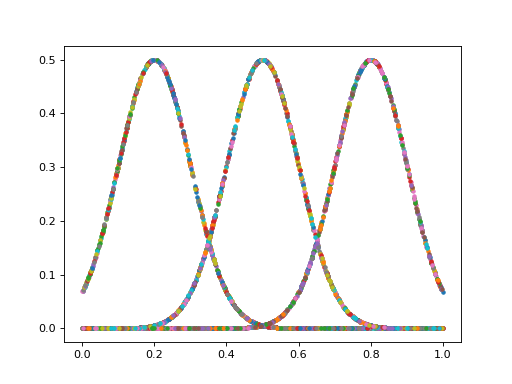

AEFIT3 ready:


In [8]:
ds = dummy.Dummy_g1data(counts=40000)
ds.kinds =  [
    {'mean': [0.8], 'sigma': [0.1], 'gain': [0.5]},
    {'mean': [0.5], 'sigma': [0.1], 'gain': [0.5]},
    {'mean': [0.2], 'sigma': [0.1], 'gain': [0.5]},    
]
ds.buffer()
dummy.test_gendata(ds)
# m = aefit.AEFIT(latent_dim=2)
m = models.AEFIT3.AEFIT3(latent_dim=2, beta=1.)

In [9]:
# aefit.test_dummy(m, data=ds, epoch=5, batch=200, loss_factor=1e-3)
models.base.train_thread(m, data=ds, epoch=5, batch=200, learning_rate=1e-3).control_panel()
# m.save('kcp/step2_t1')
# m.load('kcp/step2_t1')


Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
Epoch 1/5


W0816 15:05:32.709818 140026696427264 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:182: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


200/200 [==============================] - 18s 89ms/step - loss: 17.1489 - accuracy: 0.9997 - sce: 19.1023 - akl: 4.9363 - kld: 4.0166 - v_mea: 0.2235 - v_std: 0.9747

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009000000427477062.
Epoch 2/5
200/200 [==============================] - 15s 75ms/step - loss: 15.3676 - accuracy: 1.0000 - sce: 15.4244 - akl: 77.0340 - kld: 36.5419 - v_mea: 4.3769 - v_std: 0.0138

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000729000034625642.
Epoch 3/5
200/200 [==============================] - 14s 70ms/step - loss: 15.2432 - accuracy: 1.0000 - sce: 15.2592 - akl: 87.3771 - kld: 42.5239 - v_mea: 5.2262 - v_std: 0.0043

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0005314410154824146.
Epoch 4/5
200/200 [==============================] - 13s 66ms/step - loss: 15.1984 - accuracy: 1.0000 - sce: 15.2074 - akl: 90.0324 - kld: 44.3583 - v_mea: 5.4198 - v_std: 0.0025

Epoch 00005: LearningRateScheduler reduci

In [10]:
p = Hplt.LSPlotBokeh()
p.set_model(m)
p.set_data(ds)
p.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...

In [ ]:
def simulate_missing_data(m, lpt=[0.5,-1.6], noise_var=0.05, arr = [3,2,1,5,8,7,6,9,12,11,14,13,18]):
    xy = m.decode(tf.convert_to_tensor([pt]),apply_sigmoid=True)
    x,y = tf.split(xy[0], 2)
    x,y = (x.numpy(), y.numpy())

    fig = plt.figure('gen_missing_curve',figsize=(18, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)    
    
    ax1.set_xlim(-2.,2.)
    ax1.set_ylim(-2.,2.)
    
    ax1.scatter(pt[0],pt[1],s=80)
    ax2.scatter(x,y,s=40)

    # apply noise
    x += np.random.normal(0,noise_var,len(x))
    y += np.random.normal(0,noise_var,len(y))

    # apply missing data simulation
    for i,v in enumerate(arr,0):
        x[arr[i]]=x[arr[i]+1]
        y[arr[i]]=y[arr[i]+1]
    
    ax2.scatter(x,y,s=80)

    me,va = m.encode(tf.reshape(tf.concat([x,y],0), shape=[1,-1]))
    print("Guessed Latent point = ",me.numpy())
    gpt = me[0].numpy()
    ax1.scatter(gpt[0],gpt[1])
    
    XY = m.decode(me,apply_sigmoid=True)
    X,Y = tf.split(XY[0], 2)
    X,Y = (X.numpy(), Y.numpy())
    # plt.figure('reconstructed')
    ax2.scatter(X,Y,s=40)
    # plt.plot(X,Y)


In [ ]:
# generate from point: 0,0
pt = [0.0,0.0]
noise_var = 0.05
arr = [3,2,1,5,8,7,6,9,12,11,14,13,18]
simulate_missing_data(m,pt,noise_var,arr)

In [ ]:
# generate from point: -0.9,0
pt = [-0.9,0]
noise_var = 0.05
arr = [3,6,5,8,7,6,9,12,11,14,13,18]
simulate_missing_data(m,pt,noise_var,arr)


# TEST2: 2G Y-strafe

In [ ]:
ds = dummy.Dummy_g1data(counts=40000)
ds.kinds =  [
    {'mean': [0.5], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.5], 'sigma': [0.1], 'gain': [0.2]},
]
ds.buffer()
dummy.test_gendata(ds)
m = models.AEFIT3.AEFIT3(latent_dim=2, beta=1.)

In [ ]:
# aefit.test_dummy(m, data=ds2, epoch=5, batch=200, loss_factor=1e-3)
# m.save('kcp/step2_t2')
m.load('kcp/step2_t2')

In [ ]:
from bokeh.io import show, output_notebook
output_notebook()

p = Hplt.LSPlotBokeh()
p.set_model(m)
p.set_data(ds)
p.plot(notebook_url='http://172.17.0.2:8888')

In [ ]:
# generate from point: 0,-0.5
pt = [0,-0.5]
noise_var = 0.05
arr = [3,6,5,8,7,6,9,12,11,14,13,18]
simulate_missing_data(m,pt,noise_var,arr)

# 7G X-strafe

In [ ]:
ds = dummy.Dummy_g1data(counts=60000)
ds.kinds =  [
    {'mean': [0.8], 'sigma': [0.1], 'gain': [0.5]},
    {'mean': [0.7], 'sigma': [0.1], 'gain': [0.5]},
    {'mean': [0.6], 'sigma': [0.1], 'gain': [0.5]},
    {'mean': [0.5], 'sigma': [0.1], 'gain': [0.5]},
    {'mean': [0.4], 'sigma': [0.1], 'gain': [0.5]},
    {'mean': [0.3], 'sigma': [0.1], 'gain': [0.5]},
    {'mean': [0.2], 'sigma': [0.1], 'gain': [0.5]},    
]

dummy.test_gendata(ds)
m = aefit.AEFIT(latent_dim=2)

In [ ]:
# aefit.test_dummy(m, data=ds, epoch=5, batch=200, loss_factor=1e-3)
# m.save('kcp/step2_t3')
m.load('kcp/step2_t3')

In [ ]:
from bokeh.io import show, output_notebook
output_notebook()

p = Hplt.LSPlotBokeh()
p.set_model(m)
p.set_data(ds)
p.plot(notebook_url='http://172.17.0.2:8888')

# 7+7G XY-strafe

<IPython.core.display.Javascript object>


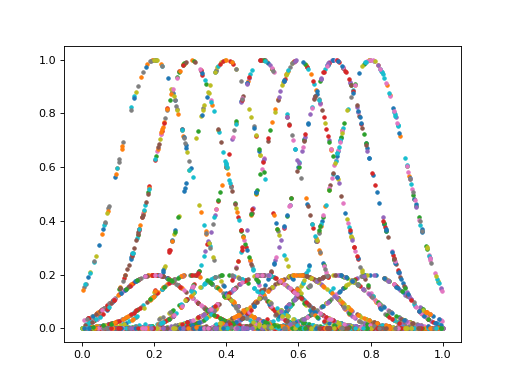

In [15]:
ds = dummy.Dummy_g1data(counts=60000)
ds.kinds =  [
    {'mean': [0.8], 'sigma': [0.1], 'gain': [0.2]},
    {'mean': [0.7], 'sigma': [0.1], 'gain': [0.2]},
    {'mean': [0.6], 'sigma': [0.1], 'gain': [0.2]},
    {'mean': [0.5], 'sigma': [0.1], 'gain': [0.2]},
    {'mean': [0.4], 'sigma': [0.1], 'gain': [0.2]},
    {'mean': [0.3], 'sigma': [0.1], 'gain': [0.2]},
    {'mean': [0.2], 'sigma': [0.1], 'gain': [0.2]},    

    {'mean': [0.8], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.7], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.6], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.5], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.4], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.3], 'sigma': [0.1], 'gain': [1.]},
    {'mean': [0.2], 'sigma': [0.1], 'gain': [1.]},    
]
ds.buffer()
dummy.test_gendata(ds)

In [16]:
# aefit.test_dummy(m, data=ds, epoch=5, batch=200, loss_factor=1e-3)
models.base.train_thread(m, data=ds, epoch=5, batch=200, learning_rate=1e-3).control_panel()
# m.save('kcp/step2_t4')
# m.load('kcp/step2_t4')


Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
Epoch 1/5
300/300 [==============================] - 21s 69ms/step - loss: 14.6984 - accuracy: 0.6905 - sce: 14.6984 - akl: 54.7769 - kld: 32.0323 - v_mea: 3.5475 - v_std: 0.0052

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009000000427477062.
Epoch 2/5
300/300 [==============================] - 21s 69ms/step - loss: 14.4920 - accuracy: 0.6952 - sce: 14.4920 - akl: 58.2951 - kld: 34.9069 - v_mea: 3.2888 - v_std: 0.0018

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000729000034625642.
Epoch 3/5
244/300 [=======================>......] - ETA: 4s - loss: 14.4539 - accuracy: 0.6966 - sce: 14.4539 - akl: 62.6394 - kld: 37.1994 - v_mea: 3.2818 - v_std: 0.0012

In [17]:
p = Hplt.LSPlotBokeh()
p.set_model(m)
p.set_data(ds)
p.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...